# **Business Case: Aerofit - Descriptive Statistics & Probability**

## **Problem Statement :**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* To perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## **Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary**

**Importing libraries**

In [ ]:
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
csv_location='/content/gdrive/MyDrive/aerofit.csv'

In [ ]:
import pandas as pd

df=pd.read_csv(csv_location)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
len(df)

180

In [ ]:
# To check the data types of Columns
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
#To check the number of unique values in each column
for i in df.columns:
  print(i,":",df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [ ]:
#To check missing values in columns
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**No missing value observed**

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


## **Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
#Number of Treadmills product wise
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
#Number of Users gender wise
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# Users education
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
#Number of users marital status wise
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
#Number of users with its expected usage in a week
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
#Number of users in different age category
age_bins = [15, 20, 25, 30, 35, 40, 45, 50]
df['age_range'] = pd.cut(df['Age'], age_bins)
df['age_range'].value_counts()

(20, 25]    69
(25, 30]    41
(30, 35]    32
(35, 40]    16
(15, 20]    10
(40, 45]     6
(45, 50]     6
Name: age_range, dtype: int64

In [ ]:
#Number of users in different income category
income_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
df['income_range(K)'] = pd.cut(df['Income']/1000, income_bins)
df['income_range(K)'].value_counts()

(50, 60]      55
(40, 50]      51
(30, 40]      31
(60, 70]      19
(90, 100]      9
(80, 90]       7
(70, 80]       4
(100, 110]     3
(20, 30]       1
Name: income_range(K), dtype: int64

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range,income_range(K)
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(20, 30]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(30, 40]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(30, 40]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(30, 40]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(30, 40]"


In [ ]:
#Number of users in different income class
#Low income class=Users with income less or equal than 45000
#Medium income class= Users with income more than 45000 and less than or equal to 65000
#High income class= Users with income more than 65000
def income_class_func(x):
  if x<=45:
    return 'Low'
  elif x>45 and x<=65:
    return 'Medium'
  else:
    return 'High'

df['income_class'] = (df['Income']/1000).apply(income_class_func )
df['income_class'].value_counts()

Medium    103
Low        49
High       28
Name: income_class, dtype: int64

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range,income_range(K),income_class
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(20, 30]",Low
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(30, 40]",Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(30, 40]",Low
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(30, 40]",Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(30, 40]",Low


In [ ]:
#Number of users with expected miles walking category
miles_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 400]
df['miles_range'] = pd.cut(df['Miles'], miles_bins)
df['miles_range'].value_counts()

(80, 90]      27
(90, 100]     27
(60, 70]      16
(70, 80]      14
(40, 50]      13
(50, 60]      13
(110, 120]    12
(100, 110]    12
(140, 150]     6
(190, 200]     6
(170, 180]     6
(200, 400]     6
(150, 160]     5
(120, 130]     5
(160, 170]     4
(130, 140]     3
(30, 40]       3
(180, 190]     1
(20, 30]       1
Name: miles_range, dtype: int64

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range,income_range(K),income_class,miles_range
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(20, 30]",Low,"(110, 120]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(30, 40]",Low,"(70, 80]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(30, 40]",Low,"(60, 70]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(30, 40]",Low,"(80, 90]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(30, 40]",Low,"(40, 50]"


**Notation used:**

P(x)= Probaility of occurance of event x
P(x/y)= Probability of occurance of event x given that y event already occured

In [ ]:
#Inspection of relationship between Product and gender
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [ ]:
pd.crosstab(df['Product'],df['Gender'],normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


* P(Female/KP281)=P(Male/KP281)=0.5
* P(Male/KP781)=0.82

In [ ]:
pd.crosstab(df['Product'],df['Gender'],normalize='columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


* P(KP281/Female)=0.53, P(KP781/Female)=0.09
* P(KP281/Male)=0.38

**Insights**

* If someone buys KP781, it is very highly likely that customer is Male

* If someone buys KP281, it is equally likely that customer could be Male or Female

* It is highly likly that Female customer will buy KP281, and very less likely that she will buy KP781


In [ ]:
#Inspection of relationship b/w Treadmill categories, Users Gender and income class
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['income_class']])

Gender       Female            Male           
income_class   High Low Medium High Low Medium
Product                                       
KP281             1  17     22    1  17     22
KP481             1   7     21    1   8     22
KP781             4   0      3   20   0     13

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['income_class']],normalize='index')

Gender          Female                       Male                    
income_class      High       Low Medium      High       Low    Medium
Product                                                              
KP281         0.012500  0.212500  0.275  0.012500  0.212500  0.275000
KP481         0.016667  0.116667  0.350  0.016667  0.133333  0.366667
KP781         0.100000  0.000000  0.075  0.500000  0.000000  0.325000

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['income_class']],normalize='columns')

Gender          Female                          Male                
income_class      High       Low    Medium      High   Low    Medium
Product                                                             
KP281         0.166667  0.708333  0.478261  0.045455  0.68  0.385965
KP481         0.166667  0.291667  0.456522  0.045455  0.32  0.385965
KP781         0.666667  0.000000  0.065217  0.909091  0.00  0.228070

**Insights**

* If someone buys KP281 or KP481, it is more likely that customer belongs to Medium income class

* If someone buys KP781, it is more likely that it is Male and either belongs to High or Medium income class

* If some customer belongs to High income class, then he/she more likely to buy KP781

* If some customer belongs to Low income class, then he/she more likely to buy KP281

* If some customer belongs to Medium income class, then they are equally likely to buy either KP281 or KP481

In [ ]:
#Inspection of relationship b/w Treadmill categories , User gender and their age range
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['age_range']])

Gender      Female                                                        \
age_range (15, 20] (20, 25] (25, 30] (30, 35] (35, 40] (40, 45] (45, 50]   
Product                                                                    
KP281            2       15       11        7        2        1        2   
KP481            1       11        5        8        4        0        0   
KP781            0        3        3        1        0        0        0   

Gender        Male                                                        
age_range (15, 20] (20, 25] (25, 30] (30, 35] (35, 40] (40, 45] (45, 50]  
Product                                                                   
KP281            4       13       10        4        6        2        1  
KP481            3       13        2        9        2        1        1  
KP781            0       14       10        3        2        2        2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['age_range']],normalize='index')

Gender       Female                                                            \
age_range  (15, 20]  (20, 25]  (25, 30]  (30, 35]  (35, 40] (40, 45] (45, 50]   
Product                                                                         
KP281      0.025000  0.187500  0.137500  0.087500  0.025000   0.0125    0.025   
KP481      0.016667  0.183333  0.083333  0.133333  0.066667   0.0000    0.000   
KP781      0.000000  0.075000  0.075000  0.025000  0.000000   0.0000    0.000   

Gender        Male                                                             
age_range (15, 20]  (20, 25]  (25, 30] (30, 35]  (35, 40]  (40, 45]  (45, 50]  
Product                                                                        
KP281         0.05  0.162500  0.125000    0.050  0.075000  0.025000  0.012500  
KP481         0.05  0.216667  0.033333    0.150  0.033333  0.016667  0.016667  
KP781         0.00  0.350000  0.250000    0.075  0.050000  0.050000  0.050000

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['age_range']],normalize='columns')

Gender       Female                                                           \
age_range  (15, 20]  (20, 25]  (25, 30] (30, 35]  (35, 40] (40, 45] (45, 50]   
Product                                                                        
KP281      0.666667  0.517241  0.578947   0.4375  0.333333      1.0      1.0   
KP481      0.333333  0.379310  0.263158   0.5000  0.666667      0.0      0.0   
KP781      0.000000  0.103448  0.157895   0.0625  0.000000      0.0      0.0   

Gender         Male                                                         
age_range  (15, 20] (20, 25]  (25, 30] (30, 35] (35, 40] (40, 45] (45, 50]  
Product                                                                     
KP281      0.571429    0.325  0.454545   0.2500      0.6      0.4     0.25  
KP481      0.428571    0.325  0.090909   0.5625      0.2      0.2     0.25  
KP781      0.000000    0.350  0.454545   0.1875      0.2      0.4     0.50

**Insights**

* If someone buys KP281/KP481, he/she likely to be in age range of 20 to 25

* Is someone buys KP781, customer is more likely to be Male in age range of 20 to 30

* If Female in age range of 35 to 40, then she is more likely to buy KP481

* If Male in age range of 35 to 40, then he is more likely to buy KP281

In [ ]:
#Inspection of Treadmill categories, User gender and Education
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['Education']])

Gender    Female                  Male                        
Education     13  14 15  16 18 21   12 13  14 15  16  18 20 21
Product                                                       
KP281          0  18  2  19  1  0    2  3  12  2  20   1  0  0
KP481          1  12  0  14  2  0    1  1  11  1  17   0  0  0
KP781          0   0  0   2  4  1    0  0   2  0  13  15  1  2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['Education']],normalize='index')

Gender       Female                                               Male  \
Education        13     14     15        16        18     21        12   
Product                                                                  
KP281      0.000000  0.225  0.025  0.237500  0.012500  0.000  0.025000   
KP481      0.016667  0.200  0.000  0.233333  0.033333  0.000  0.016667   
KP781      0.000000  0.000  0.000  0.050000  0.100000  0.025  0.000000   

Gender                                                                  
Education        13        14        15        16      18     20    21  
Product                                                                 
KP281      0.037500  0.150000  0.025000  0.250000  0.0125  0.000  0.00  
KP481      0.016667  0.183333  0.016667  0.283333  0.0000  0.000  0.00  
KP781      0.000000  0.050000  0.000000  0.325000  0.3750  0.025  0.05

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['Education']],normalize='columns')

Gender    Female                                         Male              \
Education     13   14   15        16        18   21        12    13    14   
Product                                                                     
KP281        0.0  0.6  1.0  0.542857  0.142857  0.0  0.666667  0.75  0.48   
KP481        1.0  0.4  0.0  0.400000  0.285714  0.0  0.333333  0.25  0.44   
KP781        0.0  0.0  0.0  0.057143  0.571429  1.0  0.000000  0.00  0.08   

Gender                                       
Education        15    16      18   20   21  
Product                                      
KP281      0.666667  0.40  0.0625  0.0  0.0  
KP481      0.333333  0.34  0.0000  0.0  0.0  
KP781      0.000000  0.26  0.9375  1.0  1.0

**Insights**

* If someone buys KP281/KP481, customer is more likely to be educated upto 16

* If someone busy KP781, customer is more likely to be Male and educated upto 16 or 18

In [ ]:
#Inspection of relationship b/w Treadmill categories, Users gender and marital status
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['MaritalStatus']])

Gender           Female             Male       
MaritalStatus Partnered Single Partnered Single
Product                                        
KP281                27     13        21     19
KP481                15     14        21     10
KP781                 4      3        19     14

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['MaritalStatus']],normalize='index')

Gender           Female                Male          
MaritalStatus Partnered    Single Partnered    Single
Product                                              
KP281            0.3375  0.162500    0.2625  0.237500
KP481            0.2500  0.233333    0.3500  0.166667
KP781            0.1000  0.075000    0.4750  0.350000

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Gender'],df['MaritalStatus']],normalize='columns')

Gender           Female                Male          
MaritalStatus Partnered    Single Partnered    Single
Product                                              
KP281          0.586957  0.433333  0.344262  0.441860
KP481          0.326087  0.466667  0.344262  0.232558
KP781          0.086957  0.100000  0.311475  0.325581

**Insights**

* If someone buys KP281, then customer is more likely to be married female

* If someone buys KP481/KP781, then customer is more likely to be married Male

* If Single Female buys, then she is more likely to buy KP481

* If Single Male buys, then he is more likely to buy KP281

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range,income_range(K),income_class,miles_range
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(20, 30]",Low,"(110, 120]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(30, 40]",Low,"(70, 80]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(30, 40]",Low,"(60, 70]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(30, 40]",Low,"(80, 90]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(30, 40]",Low,"(40, 50]"


In [ ]:
#Inspection b/w Treadmill categories and Customer age range
pd.crosstab(df['Product'],df['age_range'])

age_range,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
Product,,,,,,,
KP281,6,28,21,11,8,3,3
KP481,4,24,7,17,6,1,1
KP781,0,17,13,4,2,2,2


In [ ]:
pd.crosstab(df['Product'],df['age_range'],normalize='index')

age_range,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
Product,,,,,,,
KP281,0.075000,0.350,0.262500,0.137500,0.10,0.037500,0.037500
KP481,0.066667,0.400,0.116667,0.283333,0.10,0.016667,0.016667
KP781,0.000000,0.425,0.325000,0.100000,0.05,0.050000,0.050000


In [ ]:
pd.crosstab(df['Product'],df['age_range'],normalize='columns')

age_range,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
Product,,,,,,,
KP281,0.6,0.405797,0.512195,0.34375,0.500,0.500000,0.500000
KP481,0.4,0.347826,0.170732,0.53125,0.375,0.166667,0.166667
KP781,0.0,0.246377,0.317073,0.12500,0.125,0.333333,0.333333


**Insights**

* If someone buys,it is more likely that customer is having age between 20 to 30

* If someone having age between 20 to 30, then he/she more likely to buy KP281

In [ ]:
#Inspection of relationship b/w Product, User age range and marital status
pd.crosstab(index=df['Product'],columns=[df['age_range'],df['MaritalStatus']])

age_range      (15, 20]         (20, 25]         (25, 30]         (30, 35]  \
MaritalStatus Partnered Single Partnered Single Partnered Single Partnered   
Product                                                                      
KP281                 3      3        14     14        15      6         5   
KP481                 1      3        14     10         2      5        12   
KP781                 0      0         8      9         9      4         3   

age_range             (35, 40]         (40, 45]         (45, 50]  
MaritalStatus Single Partnered Single Partnered Single Partnered  
Product                                                           
KP281              6         6      2         2      1         3  
KP481              5         5      1         1      0         1  
KP781              1         1      1         0      2         2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['age_range'],df['MaritalStatus']],normalize='index')

age_range      (15, 20]          (20, 25]            (25, 30]            \
MaritalStatus Partnered  Single Partnered    Single Partnered    Single   
Product                                                                   
KP281          0.037500  0.0375  0.175000  0.175000  0.187500  0.075000   
KP481          0.016667  0.0500  0.233333  0.166667  0.033333  0.083333   
KP781          0.000000  0.0000  0.200000  0.225000  0.225000  0.100000   

age_range      (30, 35]            (35, 40]            (40, 45]          \
MaritalStatus Partnered    Single Partnered    Single Partnered  Single   
Product                                                                   
KP281            0.0625  0.075000  0.075000  0.025000  0.025000  0.0125   
KP481            0.2000  0.083333  0.083333  0.016667  0.016667  0.0000   
KP781            0.0750  0.025000  0.025000  0.025000  0.000000  0.0500   

age_range      (45, 50]  
MaritalStatus Partnered  
Product                  
KP281          0.037500  
KP481          0.016667  
KP781          0.050000

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['age_range'],df['MaritalStatus']],normalize='columns')

age_range      (15, 20]         (20, 25]            (25, 30]            \
MaritalStatus Partnered Single Partnered    Single Partnered    Single   
Product                                                                  
KP281              0.75    0.5  0.388889  0.424242  0.576923  0.400000   
KP481              0.25    0.5  0.388889  0.303030  0.076923  0.333333   
KP781              0.00    0.0  0.222222  0.272727  0.346154  0.266667   

age_range      (30, 35]            (35, 40]         (40, 45]            \
MaritalStatus Partnered    Single Partnered Single Partnered    Single   
Product                                                                  
KP281              0.25  0.500000  0.500000   0.50  0.666667  0.333333   
KP481              0.60  0.416667  0.416667   0.25  0.333333  0.000000   
KP781              0.15  0.083333  0.083333   0.25  0.000000  0.666667   

age_range      (45, 50]  
MaritalStatus Partnered  
Product                  
KP281          0.500000  
KP481          0.166667  
KP781          0.333333

**Insights**

* If someone is in age range of 40 to 45 and is single, then more likely to buy KP781

* If someone is in age range of 25 to 30 and is Partnered, then more likely to buy KP281


In [ ]:
#Inspection b/w Treadmill categories, User age range and income class
pd.crosstab(index=df['Product'],columns=[df['age_range'],df['income_class']])

age_range    (15, 20] (20, 25]            (25, 30]            (30, 35]         \
income_class      Low     High Low Medium     High Low Medium     High Medium   
Product                                                                         
KP281               6        0  23      5        1   3     17        1     10   
KP481               4        0  11     13        0   0      7        2     15   
KP781               0        3   0     14       11   0      2        4      0   

age_range    (35, 40]            (40, 45]        (45, 50]         
income_class     High Low Medium     High Medium     High Medium  
Product                                                           
KP281               0   2      6        0      3        0      3  
KP481               0   0      6        0      1        0      1  
KP781               2   0      0        2      0        2      0

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['age_range'],df['income_class']],normalize='index')

age_range     (15, 20] (20, 25]                     (25, 30]          \
income_class       Low     High       Low    Medium     High     Low   
Product                                                                
KP281         0.075000    0.000  0.287500  0.062500   0.0125  0.0375   
KP481         0.066667    0.000  0.183333  0.216667   0.0000  0.0000   
KP781         0.000000    0.075  0.000000  0.350000   0.2750  0.0000   

age_range               (30, 35]        (35, 40]               (40, 45]  \
income_class    Medium      High Medium     High    Low Medium     High   
Product                                                                   
KP281         0.212500  0.012500  0.125     0.00  0.025  0.075     0.00   
KP481         0.116667  0.033333  0.250     0.00  0.000  0.100     0.00   
KP781         0.050000  0.100000  0.000     0.05  0.000  0.000     0.05   

age_range              (45, 50]            
income_class    Medium     High    Medium  
Product                                    
KP281         0.037500     0.00  0.037500  
KP481         0.016667     0.00  0.016667  
KP781         0.000000     0.05  0.000000

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['age_range'],df['income_class']],normalize='columns')

age_range    (15, 20] (20, 25]                     (25, 30]                 \
income_class      Low     High       Low   Medium      High  Low    Medium   
Product                                                                      
KP281             0.6      0.0  0.676471  0.15625  0.083333  1.0  0.653846   
KP481             0.4      0.0  0.323529  0.40625  0.000000  0.0  0.269231   
KP781             0.0      1.0  0.000000  0.43750  0.916667  0.0  0.076923   

age_range     (30, 35]        (35, 40]             (40, 45]        (45, 50]  \
income_class      High Medium     High  Low Medium     High Medium     High   
Product                                                                       
KP281         0.142857    0.4      0.0  1.0    0.5      0.0   0.75      0.0   
KP481         0.285714    0.6      0.0  0.0    0.5      0.0   0.25      0.0   
KP781         0.571429    0.0      1.0  0.0    0.0      1.0   0.00      1.0   

age_range            
income_class Medium  
Product              
KP281          0.75  
KP481          0.25  
KP781          0.00

**Insights**

* If a person buys KP281, then customer is likely to be in age range of 20 to 25 and low income class

* If a person buys KP481/KP781, then customer is likely to be in age range of 25 to 30 and medium income class

* If a Medium income class person is in age range of 25 to 30, then very less likely to buy KP281. While, If is in age range of 30 to 35, then very high likely to buy KP281

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range,income_range(K),income_class,miles_range
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(20, 30]",Low,"(110, 120]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(30, 40]",Low,"(70, 80]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(30, 40]",Low,"(60, 70]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(30, 40]",Low,"(80, 90]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(30, 40]",Low,"(40, 50]"


In [ ]:
#Inspection of relationship b/w Treadmill categories and user education
pd.crosstab(df['Product'],df['Education'])

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,2,3,30,4,39,2,0,0
KP481,1,2,23,1,31,2,0,0
KP781,0,0,2,0,15,19,1,3


In [ ]:
pd.crosstab(df['Product'],df['Education'],normalize='index')

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.025000,0.037500,0.375000,0.050000,0.487500,0.025000,0.000,0.000
KP481,0.016667,0.033333,0.383333,0.016667,0.516667,0.033333,0.000,0.000
KP781,0.000000,0.000000,0.050000,0.000000,0.375000,0.475000,0.025,0.075


In [ ]:
pd.crosstab(df['Product'],df['Education'],normalize='columns')

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0


**Insights**

* If a person buys KP281/KP481, then customer is having education upto 16

* If a person buys KP781, then customer is having education upto 18


In [ ]:
#Inspection of relationship b/w Product, User education and user Marital status
pd.crosstab(index=df['Product'],columns=[df['Education'],df['MaritalStatus']])

Education            12               13               14               15  \
MaritalStatus Partnered Single Partnered Single Partnered Single Partnered   
Product                                                                      
KP281                 0      2         2      1        18     12         2   
KP481                 1      0         1      1        10     13         0   
KP781                 0      0         0      0         1      1         0   

Education                   16               18               20        21  \
MaritalStatus Single Partnered Single Partnered Single Partnered Partnered   
Product                                                                      
KP281              2        25     14         1      1         0         0   
KP481              1        24      7         0      2         0         0   
KP781              0         7      8        13      6         1         1   

Education             
MaritalStatus Single  
Product               
KP281              0  
KP481              0  
KP781              2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Education'],df['MaritalStatus']],normalize='index')

Education            12               13                  14            \
MaritalStatus Partnered Single Partnered    Single Partnered    Single   
Product                                                                  
KP281          0.000000  0.025  0.025000  0.012500  0.225000  0.150000   
KP481          0.016667  0.000  0.016667  0.016667  0.166667  0.216667   
KP781          0.000000  0.000  0.000000  0.000000  0.025000  0.025000   

Education            15                  16                  18            \
MaritalStatus Partnered    Single Partnered    Single Partnered    Single   
Product                                                                     
KP281             0.025  0.025000    0.3125  0.175000    0.0125  0.012500   
KP481             0.000  0.016667    0.4000  0.116667    0.0000  0.033333   
KP781             0.000  0.000000    0.1750  0.200000    0.3250  0.150000   

Education            20        21         
MaritalStatus Partnered Partnered Single  
Product                                   
KP281             0.000     0.000   0.00  
KP481             0.000     0.000   0.00  
KP781             0.025     0.025   0.05

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Education'],df['MaritalStatus']],normalize='columns')

Education            12               13               14                  15  \
MaritalStatus Partnered Single Partnered Single Partnered    Single Partnered   
Product                                                                         
KP281               0.0    1.0  0.666667    0.5  0.620690  0.461538       1.0   
KP481               1.0    0.0  0.333333    0.5  0.344828  0.500000       0.0   
KP781               0.0    0.0  0.000000    0.0  0.034483  0.038462       0.0   

Education                      16                  18                  20  \
MaritalStatus    Single Partnered    Single Partnered    Single Partnered   
Product                                                                     
KP281          0.666667  0.446429  0.482759  0.071429  0.111111       0.0   
KP481          0.333333  0.428571  0.241379  0.000000  0.222222       0.0   
KP781          0.000000  0.125000  0.275862  0.928571  0.666667       1.0   

Education            21         
MaritalStatus Partnered Single  
Product                         
KP281               0.0    0.0  
KP481               0.0    0.0  
KP781               1.0    1.0

**Insights**

* If a person buys KP281/KP481, then more likely to be educated upto 16 and Partnered

* If a person buys KP781,then more likely to be educated upto 18 and Partnered

In [ ]:
#Inspection of relationship b/w Product category and User Education and income class
pd.crosstab(index=df['Product'],columns=[df['Education'],df['income_class']])

Education     12  13          14              15       16              18  \
income_class Low Low Medium High Low Medium High Low High Low Medium High   
Product                                                                     
KP281          2   3      0    0  11     19    0   4    0  14     25    2   
KP481          1   0      2    0  12     11    1   0    0   2     29    1   
KP781          0   0      0    1   0      1    0   0    6   0      9   13   

Education             20   21  
income_class Medium High High  
Product                        
KP281             0    0    0  
KP481             1    0    0  
KP781             6    1    3

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Education'],df['income_class']],normalize='index')

Education           12      13               14                          15  \
income_class       Low     Low    Medium   High     Low    Medium      High   
Product                                                                       
KP281         0.025000  0.0375  0.000000  0.000  0.1375  0.237500  0.000000   
KP481         0.016667  0.0000  0.033333  0.000  0.2000  0.183333  0.016667   
KP781         0.000000  0.0000  0.000000  0.025  0.0000  0.025000  0.000000   

Education             16                            18               20     21  
income_class   Low  High       Low    Medium      High    Medium   High   High  
Product                                                                         
KP281         0.05  0.00  0.175000  0.312500  0.025000  0.000000  0.000  0.000  
KP481         0.00  0.00  0.033333  0.483333  0.016667  0.016667  0.000  0.000  
KP781         0.00  0.15  0.000000  0.225000  0.325000  0.150000  0.025  0.075

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Education'],df['income_class']],normalize='columns')

Education           12   13          14                       15        16  \
income_class       Low  Low Medium High       Low    Medium High  Low High   
Product                                                                      
KP281         0.666667  1.0    0.0  0.0  0.478261  0.612903  0.0  1.0  0.0   
KP481         0.333333  0.0    1.0  0.0  0.521739  0.354839  1.0  0.0  0.0   
KP781         0.000000  0.0    0.0  1.0  0.000000  0.032258  0.0  0.0  1.0   

Education                          18             20   21  
income_class    Low    Medium    High    Medium High High  
Product                                                    
KP281         0.875  0.396825  0.1250  0.000000  0.0  0.0  
KP481         0.125  0.460317  0.0625  0.142857  0.0  0.0  
KP781         0.000  0.142857  0.8125  0.857143  1.0  1.0

**Insights**

* If a person buys KP281/KP481, then customer is more likely to be educated upto 16 and medium income class

* If a person buys KP781, then customer is more likely to be educated upto 18 and high income class

* If a person educated upto 14 and is in low income class, then more likely to buy KP481. While person educated upto 14 and is in medium income class, then more likely to buy KP281

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range,income_range(K),income_class,miles_range
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(20, 30]",Low,"(110, 120]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(30, 40]",Low,"(70, 80]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(30, 40]",Low,"(60, 70]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(30, 40]",Low,"(80, 90]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(30, 40]",Low,"(40, 50]"


In [ ]:
#inspection of relationship b/w Treadmill categories and Marital status
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [ ]:
pd.crosstab(df['Product'],df['MaritalStatus'],normalize='index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


In [ ]:
pd.crosstab(df['Product'],df['MaritalStatus'],normalize='columns')

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


**Insights**

* More customers are Partnered

In [ ]:
#Inspection of relationship b/w Product , user usage and Marital status
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['Usage']])

MaritalStatus Partnered                  Single              
Usage                 2   3   4  5  6  7      2   3   4  5  6
Product                                                      
KP281                12  23  12  1  0  0      7  14  10  1  0
KP481                10  17   6  3  0  0      4  14   6  0  0
KP781                 0   0  11  5  5  2      0   1   7  7  2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['Usage']],normalize='index')

MaritalStatus Partnered                                          Single  \
Usage                 2         3      4       5      6     7         2   
Product                                                                   
KP281          0.150000  0.287500  0.150  0.0125  0.000  0.00  0.087500   
KP481          0.166667  0.283333  0.100  0.0500  0.000  0.00  0.066667   
KP781          0.000000  0.000000  0.275  0.1250  0.125  0.05  0.000000   

MaritalStatus                                 
Usage                 3      4       5     6  
Product                                       
KP281          0.175000  0.125  0.0125  0.00  
KP481          0.233333  0.100  0.0000  0.00  
KP781          0.025000  0.175  0.1750  0.05

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['Usage']],normalize='columns')

MaritalStatus Partnered                                         Single  \
Usage                 2      3         4         5    6    7         2   
Product                                                                  
KP281          0.545455  0.575  0.413793  0.111111  0.0  0.0  0.636364   
KP481          0.454545  0.425  0.206897  0.333333  0.0  0.0  0.363636   
KP781          0.000000  0.000  0.379310  0.555556  1.0  1.0  0.000000   

MaritalStatus                                  
Usage                 3         4      5    6  
Product                                        
KP281          0.482759  0.434783  0.125  0.0  
KP481          0.482759  0.260870  0.000  0.0  
KP781          0.034483  0.304348  0.875  1.0

**Insights**

* If a customer buys KP281/KP481, then customer is more likely to be Partnered and planning to use thrice in a week

* If a customer buys KP481, then more likely to be partnered, and planning to use 4 times in a week

* If a customer is planning to use treadmill more than 4 times in a week, then he/she is more likely to buy KP781

In [ ]:
#Inspection of relationship b/w Treadmill category, User Fitness and Marital status
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['Fitness']])

MaritalStatus Partnered                Single              
Fitness               1   2   3  4   5      1  2   3  4   5
Product                                                    
KP281                 1  11  31  4   1      0  3  23  5   1
KP481                 0   7  25  4   0      1  5  14  4   0
KP781                 0   0   1  5  17      0  0   3  2  12

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['Fitness']],normalize='index')

MaritalStatus Partnered                                          Single  \
Fitness               1         2         3         4       5         1   
Product                                                                   
KP281            0.0125  0.137500  0.387500  0.050000  0.0125  0.000000   
KP481            0.0000  0.116667  0.416667  0.066667  0.0000  0.016667   
KP781            0.0000  0.000000  0.025000  0.125000  0.4250  0.000000   

MaritalStatus                                        
Fitness               2         3         4       5  
Product                                              
KP281          0.037500  0.287500  0.062500  0.0125  
KP481          0.083333  0.233333  0.066667  0.0000  
KP781          0.000000  0.075000  0.050000  0.3000

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['Fitness']],normalize='columns')

MaritalStatus Partnered                                         Single         \
Fitness               1         2         3         4         5      1      2   
Product                                                                         
KP281               1.0  0.611111  0.543860  0.307692  0.055556    0.0  0.375   
KP481               0.0  0.388889  0.438596  0.307692  0.000000    1.0  0.625   
KP781               0.0  0.000000  0.017544  0.384615  0.944444    0.0  0.000   

MaritalStatus                             
Fitness            3         4         5  
Product                                   
KP281          0.575  0.454545  0.076923  
KP481          0.350  0.363636  0.000000  
KP781          0.075  0.181818  0.923077

**Insights**

* If a customer is Partnered and rated themselves 4 on fitness, then more likely to buy KP781

* If a customer is Single and rated themselves 4 on fitness, then more likely to buy KP281

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range,income_range(K),income_class,miles_range
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(20, 30]",Low,"(110, 120]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(30, 40]",Low,"(70, 80]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(30, 40]",Low,"(60, 70]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(30, 40]",Low,"(80, 90]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(30, 40]",Low,"(40, 50]"


In [ ]:
#Inspection of relationship b/w Treadmill category, User marital status and age range
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['age_range']])

MaritalStatus Partnered                                                        \
age_range      (15, 20] (20, 25] (25, 30] (30, 35] (35, 40] (40, 45] (45, 50]   
Product                                                                         
KP281                 3       14       15        5        6        2        3   
KP481                 1       14        2       12        5        1        1   
KP781                 0        8        9        3        1        0        2   

MaritalStatus   Single                                               
age_range     (15, 20] (20, 25] (25, 30] (30, 35] (35, 40] (40, 45]  
Product                                                              
KP281                3       14        6        6        2        1  
KP481                3       10        5        5        1        0  
KP781                0        9        4        1        1        2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['age_range']],normalize='index')

MaritalStatus Partnered                                                   \
age_range      (15, 20]  (20, 25]  (25, 30] (30, 35]  (35, 40]  (40, 45]   
Product                                                                    
KP281          0.037500  0.175000  0.187500   0.0625  0.075000  0.025000   
KP481          0.016667  0.233333  0.033333   0.2000  0.083333  0.016667   
KP781          0.000000  0.200000  0.225000   0.0750  0.025000  0.000000   

MaritalStatus             Single                                          \
age_range      (45, 50] (15, 20]  (20, 25]  (25, 30]  (30, 35]  (35, 40]   
Product                                                                    
KP281          0.037500   0.0375  0.175000  0.075000  0.075000  0.025000   
KP481          0.016667   0.0500  0.166667  0.083333  0.083333  0.016667   
KP781          0.050000   0.0000  0.225000  0.100000  0.025000  0.025000   

MaritalStatus           
age_range     (40, 45]  
Product                 
KP281           0.0125  
KP481           0.0000  
KP781           0.0500

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['age_range']],normalize='columns')

MaritalStatus Partnered                                                   \
age_range      (15, 20]  (20, 25]  (25, 30] (30, 35]  (35, 40]  (40, 45]   
Product                                                                    
KP281              0.75  0.388889  0.576923     0.25  0.500000  0.666667   
KP481              0.25  0.388889  0.076923     0.60  0.416667  0.333333   
KP781              0.00  0.222222  0.346154     0.15  0.083333  0.000000   

MaritalStatus             Single                                         \
age_range      (45, 50] (15, 20]  (20, 25]  (25, 30]  (30, 35] (35, 40]   
Product                                                                   
KP281          0.500000      0.5  0.424242  0.400000  0.500000     0.50   
KP481          0.166667      0.5  0.303030  0.333333  0.416667     0.25   
KP781          0.333333      0.0  0.272727  0.266667  0.083333     0.25   

MaritalStatus            
age_range      (40, 45]  
Product                  
KP281          0.333333  
KP481          0.000000  
KP781          0.666667

**Insights**

* If a customer is Partnered and in age range of 30 and 35, more likely to buy KP481. While, if a customer is single and in age range of 30 and 35, more likely to buy KP281

* If a customer is Partnered and in age range of 40 to 45, more likely to buy KP281. While, if a customer is Single, and in age range of 40 to 45, more likely to buy KP781


In [ ]:
#Inspection of relationship b/w Treadmill category, User Marital status and Income range
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['income_range(K)']])

MaritalStatus   Partnered                                               \
income_range(K)  (30, 40] (40, 50] (50, 60] (60, 70] (70, 80] (80, 90]   
Product                                                                  
KP281                  11       16       16        5        0        0   
KP481                   6        9       17        4        0        0   
KP781                   0        1        1        4        4        3   

MaritalStatus                          Single                             \
income_range(K) (90, 100] (100, 110] (20, 30] (30, 40] (40, 50] (50, 60]   
Product                                                                    
KP281                   0          0        1       11        9       10   
KP481                   0          0        0        3       12        6   
KP781                   7          3        0        0        4        5   

MaritalStatus                                
income_range(K) (60, 70] (80, 90] (90, 100]  
Product                                      
KP281                  1        0         0  
KP481                  3        0         0  
KP781                  2        4         2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['income_range(K)']],normalize='index')

MaritalStatus   Partnered                                                 \
income_range(K)  (30, 40] (40, 50]  (50, 60]  (60, 70] (70, 80] (80, 90]   
Product                                                                    
KP281              0.1375    0.200  0.200000  0.062500      0.0    0.000   
KP481              0.1000    0.150  0.283333  0.066667      0.0    0.000   
KP781              0.0000    0.025  0.025000  0.100000      0.1    0.075   

MaritalStatus                          Single                             \
income_range(K) (90, 100] (100, 110] (20, 30] (30, 40] (40, 50] (50, 60]   
Product                                                                    
KP281               0.000      0.000   0.0125   0.1375   0.1125    0.125   
KP481               0.000      0.000   0.0000   0.0500   0.2000    0.100   
KP781               0.175      0.075   0.0000   0.0000   0.1000    0.125   

MaritalStatus                                
income_range(K) (60, 70] (80, 90] (90, 100]  
Product                                      
KP281             0.0125      0.0      0.00  
KP481             0.0500      0.0      0.00  
KP781             0.0500      0.1      0.05

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['income_range(K)']],normalize='columns')

MaritalStatus   Partnered                                                  \
income_range(K)  (30, 40]  (40, 50]  (50, 60]  (60, 70] (70, 80] (80, 90]   
Product                                                                     
KP281            0.647059  0.615385  0.470588  0.384615      0.0      0.0   
KP481            0.352941  0.346154  0.500000  0.307692      0.0      0.0   
KP781            0.000000  0.038462  0.029412  0.307692      1.0      1.0   

MaritalStatus                          Single                               \
income_range(K) (90, 100] (100, 110] (20, 30]  (30, 40] (40, 50]  (50, 60]   
Product                                                                      
KP281                 0.0        0.0      1.0  0.785714     0.36  0.476190   
KP481                 0.0        0.0      0.0  0.214286     0.48  0.285714   
KP781                 1.0        1.0      0.0  0.000000     0.16  0.238095   

MaritalStatus                                 
income_range(K)  (60, 70] (80, 90] (90, 100]  
Product                                       
KP281            0.166667      0.0       0.0  
KP481            0.500000      0.0       0.0  
KP781            0.333333      1.0       1.0

**Insights**

* If a customer is Partnered and income is in between 50k to 60k, then more likely to buy KP481

* If a customer is Single and income is in between 50k to 60k, then more likely to buy KP281

In [ ]:
#Inspection of relationship b/w Treadmill categories, User Marital status and income class
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['income_class']])

MaritalStatus Partnered            Single           
income_class       High Low Medium   High Low Medium
Product                                             
KP281                 1  17     30      1  17     14
KP481                 0   8     28      2   7     15
KP781                17   0      6      7   0     10

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['MaritalStatus'],df['income_class']],normalize='columns')

MaritalStatus Partnered                Single                    
income_class       High   Low   Medium   High       Low    Medium
Product                                                          
KP281          0.055556  0.68  0.46875    0.1  0.708333  0.358974
KP481          0.000000  0.32  0.43750    0.2  0.291667  0.384615
KP781          0.944444  0.00  0.09375    0.7  0.000000  0.256410

**Insights**

* If a customer is Partered and belongs to medium income class, then likely to buy KP281. While, if customer is single and belongs to Medium income class, then likely to buy KP481

In [ ]:
#Inspection of relationship b/w Treadmill categories and No of times user plans to use treadmill in a week
pd.crosstab(df['Product'],df['Usage'])

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,19,37,22,2,0,0
KP481,14,31,12,3,0,0
KP781,0,1,18,12,7,2


In [ ]:
pd.crosstab(df['Product'],df['Usage'],normalize='index')

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.237500,0.462500,0.275,0.025,0.000,0.00
KP481,0.233333,0.516667,0.200,0.050,0.000,0.00
KP781,0.000000,0.025000,0.450,0.300,0.175,0.05


In [ ]:
pd.crosstab(df['Product'],df['Usage'],normalize='columns')

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0


**Insights**

* If a customer buys KP281/KP481, then more likely to use treadmill 3 times a week

* If a customer buys KP781, then more likely to use 4 times a week

* If a customer plans to use treadmill less than 5 times a week, then more likely to buy KP281, else more likely to buy KP781

In [ ]:
#Inspection of relationship b/w Treadmill categories , User Usage times and fitness rating
pd.crosstab(index=df['Product'],columns=[df['Usage'],df['Fitness']])

Usage    2         3               4             5        6     7
Fitness  1  2   3  1  2   3  4  5  2   3  4   5  3  4  5  4  5  5
Product                                                          
KP281    0  9  10  1  4  27  5  0  1  17  3   1  0  1  1  0  0  0
KP481    1  5   8  0  6  20  5  0  1   9  2   0  2  1  0  0  0  0
KP781    0  0   0  0  0   0  0  1  0   4  2  12  0  4  8  1  6  2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Usage'],df['Fitness']],normalize='columns')

Usage      2                        3                             4            \
Fitness    1         2         3    1    2         3    4    5    2         3   
Product                                                                         
KP281    0.0  0.642857  0.555556  1.0  0.4  0.574468  0.5  0.0  0.5  0.566667   
KP481    1.0  0.357143  0.444444  0.0  0.6  0.425532  0.5  0.0  0.5  0.300000   
KP781    0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  1.0  0.0  0.133333   

Usage                          5                        6         7  
Fitness         4         5    3         4         5    4    5    5  
Product                                                              
KP281    0.428571  0.076923  0.0  0.166667  0.111111  0.0  0.0  0.0  
KP481    0.285714  0.000000  1.0  0.166667  0.000000  0.0  0.0  0.0  
KP781    0.285714  0.923077  0.0  0.666667  0.888889  1.0  1.0  1.0

In [ ]:
#Inspection of relationship b/w Treadmill categories, User usage number and income class
pd.crosstab(index=df['Product'],columns=[df['Usage'],df['income_class']])

Usage           2               3               4               5             \
income_class High Low Medium High Low Medium High Low Medium High Low Medium   
Product                                                                        
KP281           0   5     14    2  17     18    0  10     12    0   2      0   
KP481           1   4      9    1  10     20    0   0     12    0   1      2   
KP781           0   0      0    0   0      1    9   0      9    6   0      6   

Usage           6    7  
income_class High High  
Product                 
KP281           0    0  
KP481           0    0  
KP781           7    2

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['Usage'],df['income_class']],normalize='columns')

Usage           2                             3                       4       \
income_class High       Low    Medium      High      Low    Medium High  Low   
Product                                                                        
KP281         0.0  0.555556  0.608696  0.666667  0.62963  0.461538  0.0  1.0   
KP481         1.0  0.444444  0.391304  0.333333  0.37037  0.512821  0.0  0.0   
KP781         0.0  0.000000  0.000000  0.000000  0.00000  0.025641  1.0  0.0   

Usage                     5                     6    7  
income_class    Medium High       Low Medium High High  
Product                                                 
KP281         0.363636  0.0  0.666667   0.00  0.0  0.0  
KP481         0.363636  0.0  0.333333   0.25  0.0  0.0  
KP781         0.272727  1.0  0.000000   0.75  1.0  1.0

In [ ]:
#Inspection of relationship b/w Treadmill categories and User age range
pd.crosstab(df['Product'],df['age_range'])

age_range,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
Product,,,,,,,
KP281,6,28,21,11,8,3,3
KP481,4,24,7,17,6,1,1
KP781,0,17,13,4,2,2,2


In [ ]:
pd.crosstab(df['Product'],df['age_range'],normalize='index')

age_range,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
Product,,,,,,,
KP281,0.075000,0.350,0.262500,0.137500,0.10,0.037500,0.037500
KP481,0.066667,0.400,0.116667,0.283333,0.10,0.016667,0.016667
KP781,0.000000,0.425,0.325000,0.100000,0.05,0.050000,0.050000


In [ ]:
pd.crosstab(df['Product'],df['age_range'],normalize='columns')

age_range,"(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]"
Product,,,,,,,
KP281,0.6,0.405797,0.512195,0.34375,0.500,0.500000,0.500000
KP481,0.4,0.347826,0.170732,0.53125,0.375,0.166667,0.166667
KP781,0.0,0.246377,0.317073,0.12500,0.125,0.333333,0.333333


**Insights**

* More customers are in age range of 20 to 30

* if a customer is in age range of 30 to 35, then more likely to buy KP481

In [ ]:
#Inspection of relationship b/w treadmill categories, User age range and income class
pd.crosstab(index=df['Product'],columns=[df['age_range'],df['income_class']])

age_range    (15, 20] (20, 25]            (25, 30]            (30, 35]         \
income_class      Low     High Low Medium     High Low Medium     High Medium   
Product                                                                         
KP281               6        0  23      5        1   3     17        1     10   
KP481               4        0  11     13        0   0      7        2     15   
KP781               0        3   0     14       11   0      2        4      0   

age_range    (35, 40]            (40, 45]        (45, 50]         
income_class     High Low Medium     High Medium     High Medium  
Product                                                           
KP281               0   2      6        0      3        0      3  
KP481               0   0      6        0      1        0      1  
KP781               2   0      0        2      0        2      0

In [ ]:
pd.crosstab(index=df['Product'],columns=[df['age_range'],df['income_class']],normalize='columns')

age_range    (15, 20] (20, 25]                     (25, 30]                 \
income_class      Low     High       Low   Medium      High  Low    Medium   
Product                                                                      
KP281             0.6      0.0  0.676471  0.15625  0.083333  1.0  0.653846   
KP481             0.4      0.0  0.323529  0.40625  0.000000  0.0  0.269231   
KP781             0.0      1.0  0.000000  0.43750  0.916667  0.0  0.076923   

age_range     (30, 35]        (35, 40]             (40, 45]        (45, 50]  \
income_class      High Medium     High  Low Medium     High Medium     High   
Product                                                                       
KP281         0.142857    0.4      0.0  1.0    0.5      0.0   0.75      0.0   
KP481         0.285714    0.6      0.0  0.0    0.5      0.0   0.25      0.0   
KP781         0.571429    0.0      1.0  0.0    0.0      1.0   0.00      1.0   

age_range            
income_class Medium  
Product              
KP281          0.75  
KP481          0.25  
KP781          0.00

**Insights**

* If a person is in age range of 25 to 30 and in medium income class, then likely to buy KP781.

* If a person is in age range of 30 to 35 and in medium income class, then highly likely to buy KP281

In [ ]:
#Inspection of relationship b/w Product category and user income range
pd.crosstab(df['Product'],df['income_range(K)'])

income_range(K),"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]"
Product,,,,,,,,,
KP281,1,22,25,26,6,0,0,0,0
KP481,0,9,21,23,7,0,0,0,0
KP781,0,0,5,6,6,4,7,9,3


In [ ]:
pd.crosstab(df['Product'],df['income_range(K)'],normalize='index')

income_range(K),"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]"
Product,,,,,,,,,
KP281,0.0125,0.275,0.3125,0.325000,0.075000,0.0,0.000,0.000,0.000
KP481,0.0000,0.150,0.3500,0.383333,0.116667,0.0,0.000,0.000,0.000
KP781,0.0000,0.000,0.1250,0.150000,0.150000,0.1,0.175,0.225,0.075


In [ ]:
pd.crosstab(df['Product'],df['income_range(K)'],normalize='columns')

income_range(K),"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]"
Product,,,,,,,,,
KP281,1.0,0.709677,0.490196,0.472727,0.315789,0.0,0.0,0.0,0.0
KP481,0.0,0.290323,0.411765,0.418182,0.368421,0.0,0.0,0.0,0.0
KP781,0.0,0.000000,0.098039,0.109091,0.315789,1.0,1.0,1.0,1.0


**Insights**

* If a person buys KP281/KP481, then more likely to be in income range of 40k to 60k

* If a person buys KP781, then more likely to be in income range of 80k to 100k

In [ ]:
#Inspection of relationship b/w treadmill category and user income class
pd.crosstab(df['Product'],df['income_class'])

income_class,High,Low,Medium
Product,,,
KP281,2,34,44
KP481,2,15,43
KP781,24,0,16


In [ ]:
pd.crosstab(df['Product'],df['income_class'],normalize='index')

income_class,High,Low,Medium
Product,,,
KP281,0.025000,0.425,0.550000
KP481,0.033333,0.250,0.716667
KP781,0.600000,0.000,0.400000


In [ ]:
pd.crosstab(df['Product'],df['income_class'],normalize='columns')

income_class,High,Low,Medium
Product,,,
KP281,0.071429,0.693878,0.427184
KP481,0.071429,0.306122,0.417476
KP781,0.857143,0.000000,0.155340


**Insights**

* If a person buy KP281/KP481, then more likely to be in medium income class. While, if a person buys KP781, then more likely to be in High income class


In [ ]:
#Inspection of relationship b/w Treadmill categories and User expects to walk using treadmill in a week
pd.crosstab(df['Product'],df['miles_range'])

miles_range,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]","(110, 120]","(120, 130]","(130, 140]","(140, 150]","(150, 160]","(160, 170]","(170, 180]","(180, 190]","(190, 200]","(200, 400]"
Product,,,,,,,,,,,,,,,,,,,
KP281,0,3,9,6,10,10,16,8,3,9,0,2,2,0,1,0,1,0,0
KP481,1,0,4,7,6,3,11,12,8,0,5,0,0,0,2,0,0,0,1
KP781,0,0,0,0,0,1,0,7,1,3,0,1,4,5,1,6,0,6,5


In [ ]:
pd.crosstab(df['Product'],df['miles_range'],normalize='index')

miles_range,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]","(110, 120]","(120, 130]","(130, 140]","(140, 150]","(150, 160]","(160, 170]","(170, 180]","(180, 190]","(190, 200]","(200, 400]"
Product,,,,,,,,,,,,,,,,,,,
KP281,0.000000,0.0375,0.112500,0.075000,0.125,0.125,0.200000,0.100,0.037500,0.1125,0.000000,0.025,0.025,0.000,0.012500,0.00,0.0125,0.00,0.000000
KP481,0.016667,0.0000,0.066667,0.116667,0.100,0.050,0.183333,0.200,0.133333,0.0000,0.083333,0.000,0.000,0.000,0.033333,0.00,0.0000,0.00,0.016667
KP781,0.000000,0.0000,0.000000,0.000000,0.000,0.025,0.000000,0.175,0.025000,0.0750,0.000000,0.025,0.100,0.125,0.025000,0.15,0.0000,0.15,0.125000


In [ ]:
pd.crosstab(df['Product'],df['miles_range'],normalize='columns')

miles_range,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]","(110, 120]","(120, 130]","(130, 140]","(140, 150]","(150, 160]","(160, 170]","(170, 180]","(180, 190]","(190, 200]","(200, 400]"
Product,,,,,,,,,,,,,,,,,,,
KP281,0.0,1.0,0.692308,0.461538,0.625,0.714286,0.592593,0.296296,0.250000,0.75,0.0,0.666667,0.333333,0.0,0.25,0.0,1.0,0.0,0.000000
KP481,1.0,0.0,0.307692,0.538462,0.375,0.214286,0.407407,0.444444,0.666667,0.00,1.0,0.000000,0.000000,0.0,0.50,0.0,0.0,0.0,0.166667
KP781,0.0,0.0,0.000000,0.000000,0.000,0.071429,0.000000,0.259259,0.083333,0.25,0.0,0.333333,0.666667,1.0,0.25,1.0,0.0,1.0,0.833333


**Insights**

* If a customer buys KP281, then more likely to walk 80 to 90 miles in a week

* If a customer buys KP481/KP781, then more likely to walk 90 to 100 miles in a week

## **Visual Analysis - Univariate & Bivariate**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range,income_range(K),income_class,miles_range
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(20, 30]",Low,"(110, 120]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(30, 40]",Low,"(70, 80]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(30, 40]",Low,"(60, 70]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(30, 40]",Low,"(80, 90]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(30, 40]",Low,"(40, 50]"


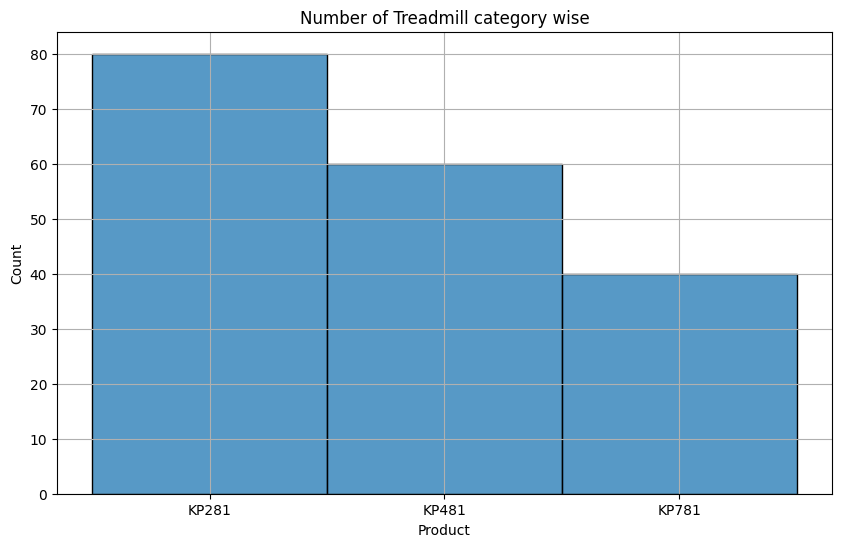

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(data=df,x='Product')
plt.title('Number of Treadmill category wise')
plt.grid()
plt.show()

**Insights**

* More number of sales of KP281 treadmill

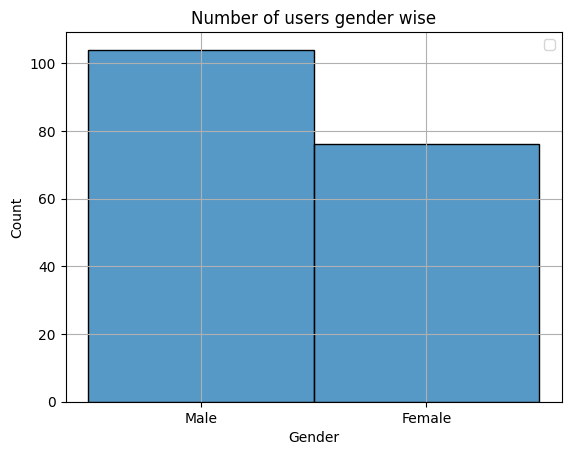

In [ ]:
sns.histplot(data=df,x='Gender')
plt.title('Number of users gender wise')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* More number of users are Male

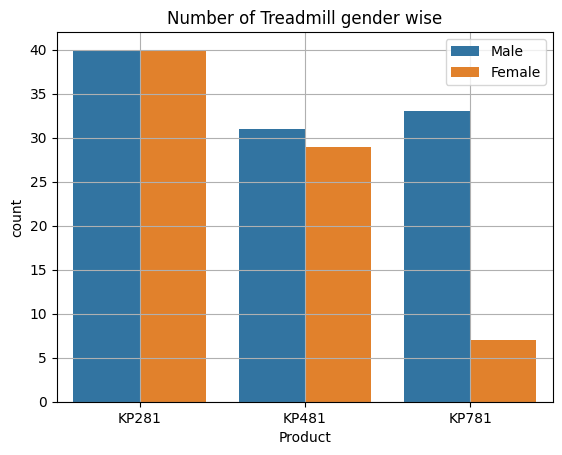

In [ ]:
sns.countplot(data=df,x='Product',hue='Gender')
plt.title('Number of Treadmill gender wise')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* If a customer buys KP281, then equal probability of customer being either Male or Female

* If a customer buys KP781, then highly likely to be Male

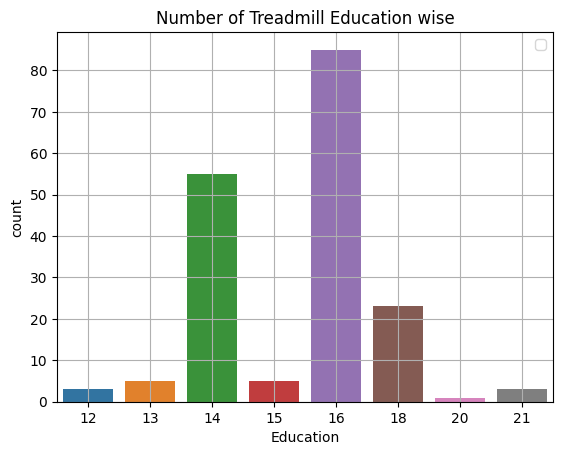

In [ ]:
sns.countplot(data=df,x='Education')
plt.title('Number of Users Education wise')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* More Number of users are educated upto 16

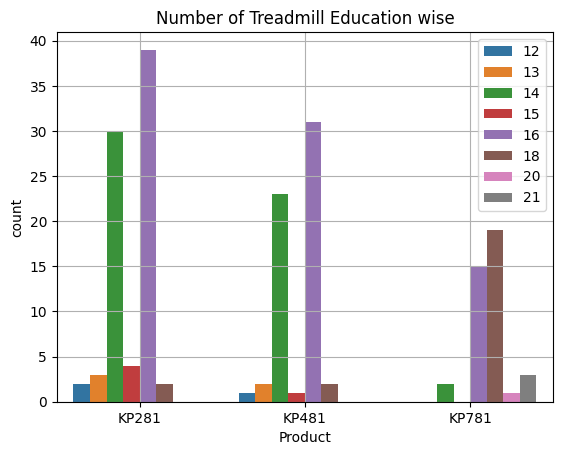

In [ ]:
sns.countplot(data=df,x='Product',hue='Education')
plt.title('Number of Treadmill Education wise')
plt.legend(loc='best')
plt.grid()
plt.show()

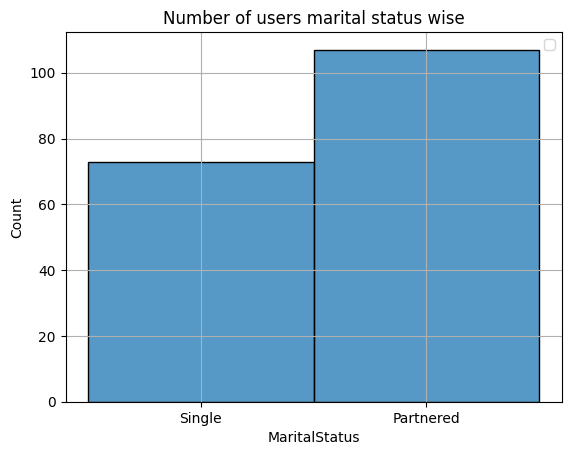

In [ ]:
sns.histplot(data=df,x='MaritalStatus')
plt.title('Number of users marital status wise')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* More number of users are partnered

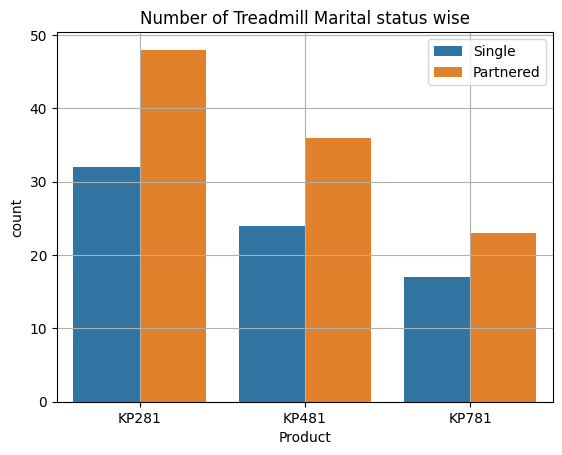

In [ ]:
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.title('Number of Treadmill Marital status wise')
plt.legend(loc='best')
plt.grid()
plt.show()

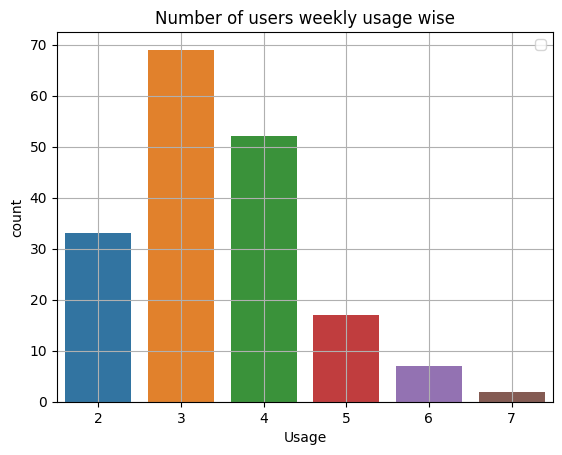

In [ ]:
sns.countplot(data=df,x='Usage')
plt.title('Number of users weekly usage wise')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* More number of users weekly usage is thrice.

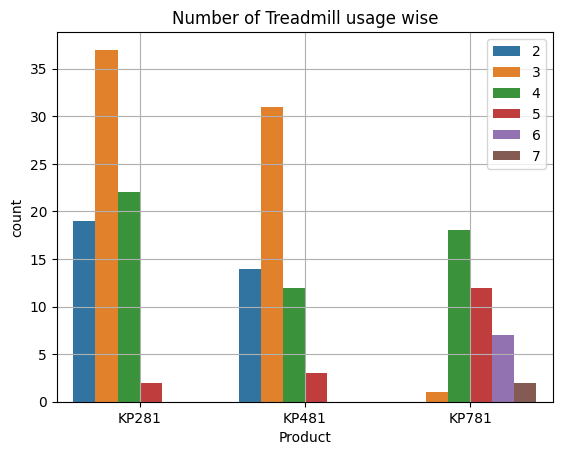

In [ ]:
sns.countplot(data=df,x='Product',hue='Usage')
plt.title('Number of Treadmill usage wise')
plt.legend(loc='best')
plt.grid()
plt.show()

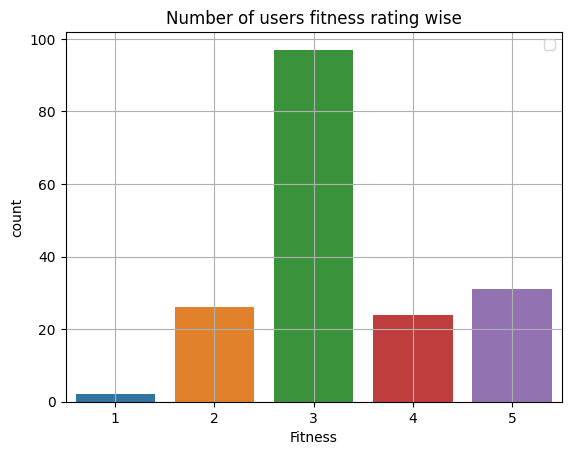

In [ ]:
sns.countplot(data=df,x='Fitness')
plt.title('Number of users fitness rating wise')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* More number of users rated themselves 3.

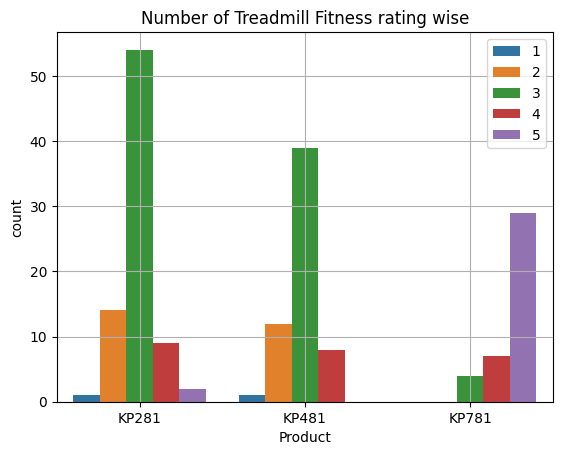

In [ ]:
sns.countplot(data=df,x='Product',hue='Fitness')
plt.title('Number of Treadmill Fitness rating wise')
plt.legend(loc='best')
plt.grid()
plt.show()

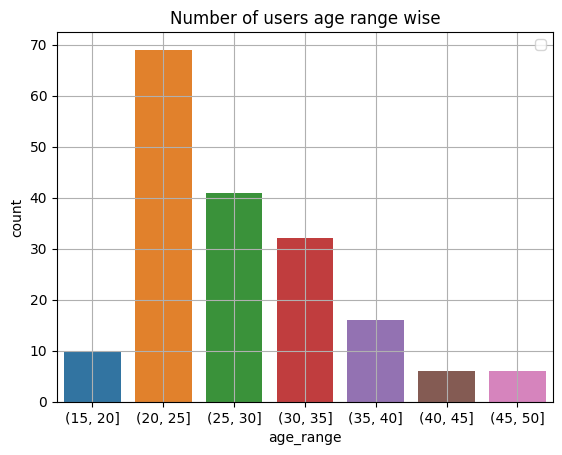

In [ ]:
sns.countplot(data=df,x='age_range')
plt.title('Number of users age range wise')
plt.legend(loc='best')
plt.grid()
plt.show()

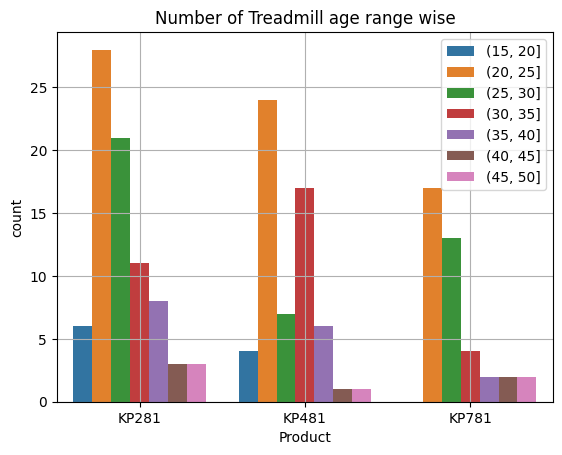

In [ ]:
sns.countplot(data=df,x='Product',hue='age_range')
plt.title('Number of Treadmill age range wise')
plt.legend(loc='best')
plt.grid()
plt.show()

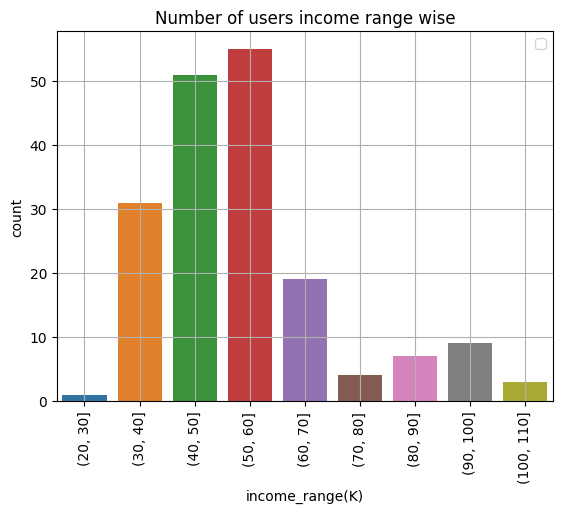

In [ ]:
sns.countplot(data=df,x='income_range(K)')
plt.title('Number of users income range wise')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()

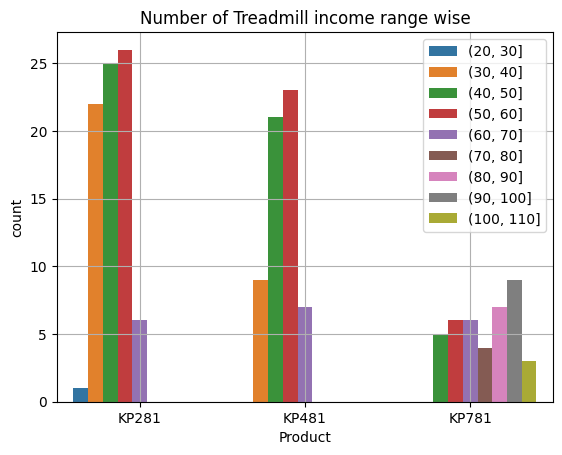

In [ ]:
sns.countplot(data=df,x='Product',hue='income_range(K)')
plt.title('Number of Treadmill income range wise')
plt.legend(loc='best')
plt.grid()
plt.show()

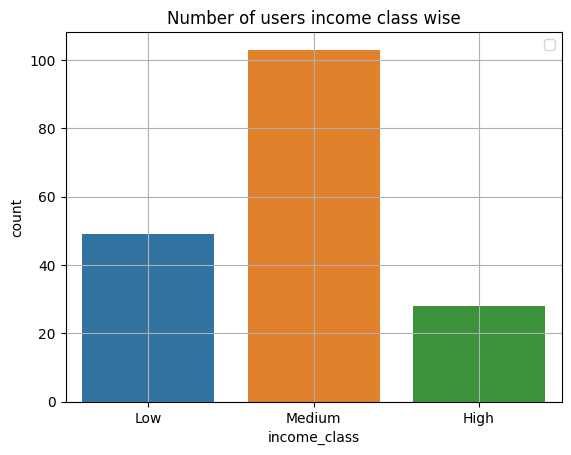

In [ ]:
sns.countplot(data=df,x='income_class')
plt.title('Number of users income class wise')
plt.legend(loc='best')
plt.grid()
plt.show()

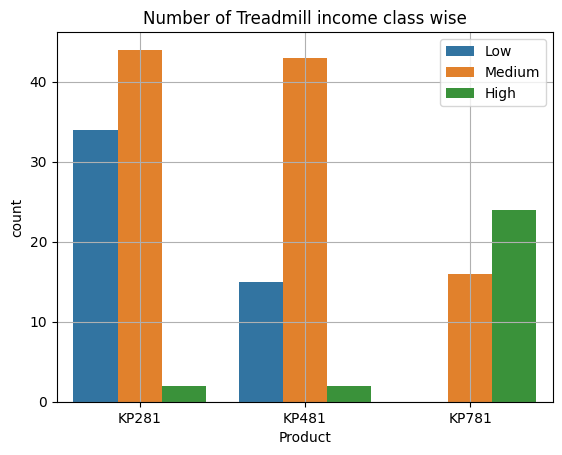

In [ ]:
sns.countplot(data=df,x='Product',hue='income_class')
plt.title('Number of Treadmill income class wise')
plt.legend(loc='best')
plt.grid()
plt.show()

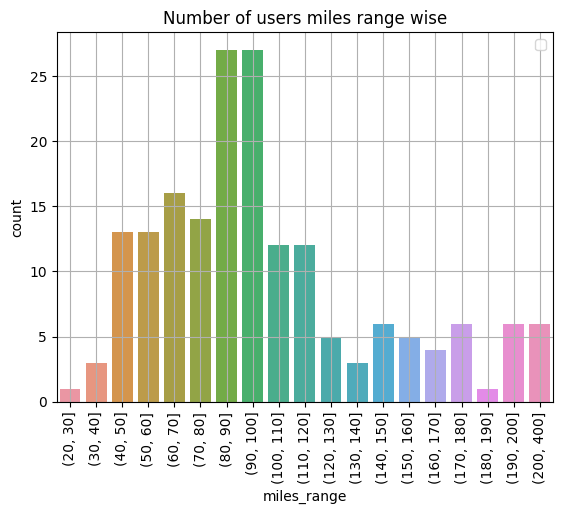

In [ ]:
sns.countplot(data=df,x='miles_range')
plt.title('Number of users miles range wise')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()

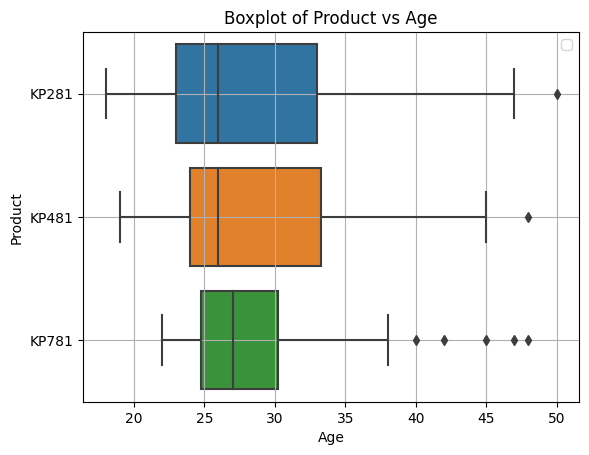

In [ ]:
sns.boxplot(data=df,x='Age',y='Product')
plt.title('Boxplot of Product vs Age')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* Mean age of users buying KP781 is more than median age of users buying KP281/KP481

* Maximum age of users buying KP281 is more than maximum age of users buying KP481/KP781

* Customer buying KP781, mostly belongs to age range of 25 to 30


**Outliers**

* For KP281/KP481, people having age more than 47.5 will be coming under outliers

* For KP781, people having age more than 40 will be coming under outliers



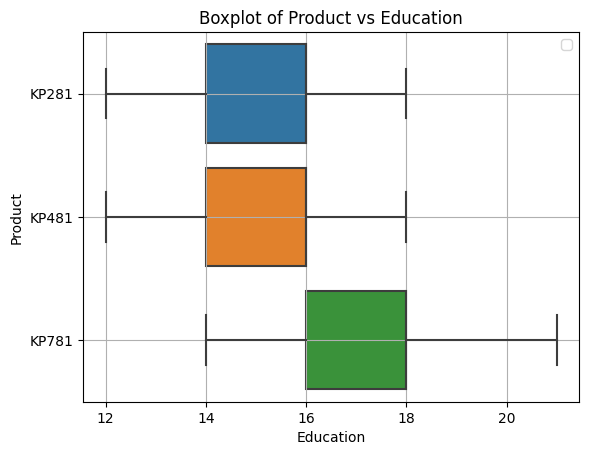

In [ ]:
sns.boxplot(data=df,x='Education',y='Product')
plt.title('Boxplot of Product vs Education')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* Median education of customer buying KP781 is more than KP281/KP481

* Minimum/Highest education of customer buying KP781 is more than KP281/KP481

* 50% of customer that buys KP781 are educated between 16 to 18, while 50% of customer that buys KP281/KP481 are educated between 14 to 16

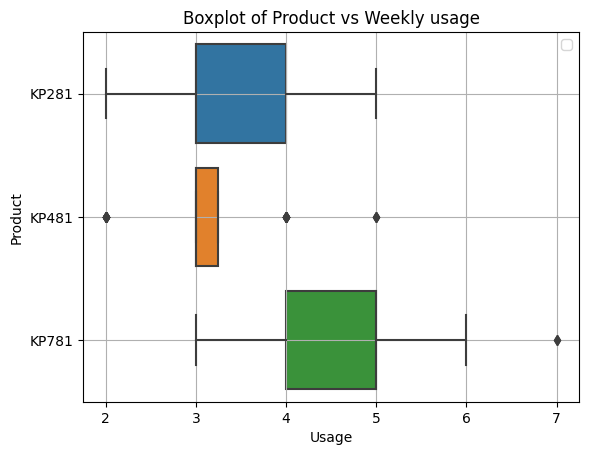

In [ ]:
sns.boxplot(data=df,x='Usage',y='Product')
plt.title('Boxplot of Product vs Weekly usage')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* Median number of weekly usage hours is Highest for customer buying KP781

* Maximum number of weekly usage hours is more for customer buying KP781

**Outliers**

* For KP481, weekly usage hours less than 3 and more than 4 will be counted as outlier

* For KP781, weekly usage hours more than 6 will be counted as outlier

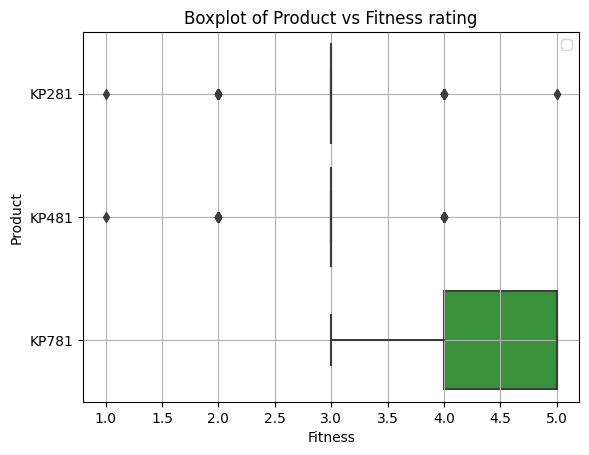

In [ ]:
sns.boxplot(data=df,x='Fitness',y='Product')
plt.title('Boxplot of Product vs Fitness rating')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* Median fitness rating of User buying KP781 is more than user buying KP281/KP481

**Outliers**

* For KP281/KP481, any fitness rating other than 3 will be counted as outlier

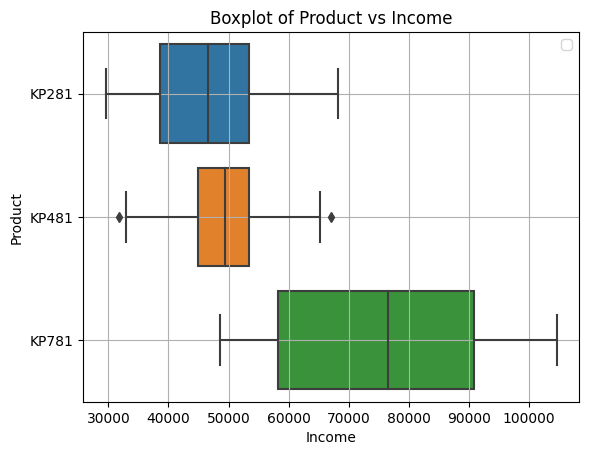

In [ ]:
sns.boxplot(data=df,x='Income',y='Product')
plt.title('Boxplot of Product vs Income')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* Median age of Users buying KP781 is more than median age of users buying KP281/KP481

* 50% of customer buying KP781 income lies roughly in range of 60k to 90k

* 50% of customer buying KP281 income lies roughly in range of 40k to 55k

* 50% of customer buying KP781 income lies roughly in range of 45k to 55k

* Maximum income of customer buying KP281 is more than customer buying KP481

**Outliers**

* For customer buying KP781, if income is less than 33K and more than 65K, then it will be counted as outliers

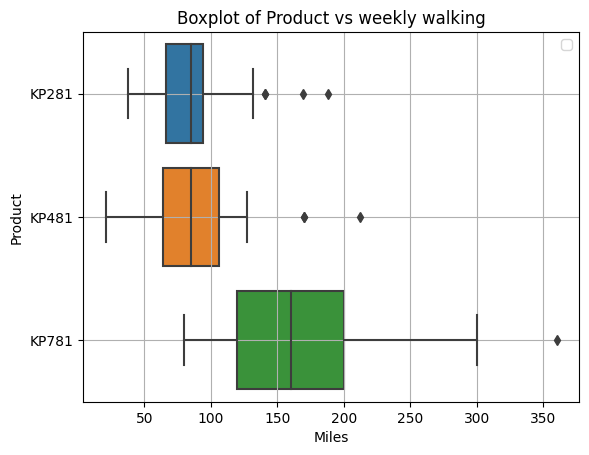

In [ ]:
sns.boxplot(data=df,x='Miles',y='Product')
plt.title('Boxplot of Product vs weekly walking')
plt.legend(loc='best')
plt.grid()
plt.show()

**Insights**

* Median of weekly walking expectated by users of KP781 is more than other users.

**Outliers**

* For customer buying KP281, if expected number of miles in a week is more than 125, then it will be counted as outliers

* For customer buying KP481, if expected number of miles in a week is more than 120, then it will be counted as outliers

* For customer buying KP781, if expected number of miles in a week is more than 300, then it will be counted as outliers

<ipython-input-276-fe6aadc53e22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


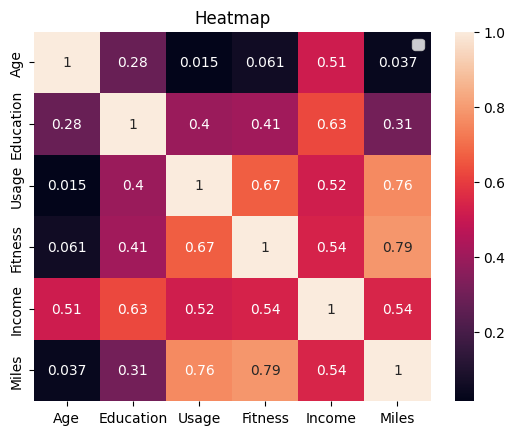

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap')
plt.legend(loc='best')
plt.show()

**Insights**

* Age and income are highly positive co-related

* Education and Income are highly positive co-related

* Number of times usage and Fitness, Income, Miles are highly positive co-related

* Income and Education are highly positive co-related


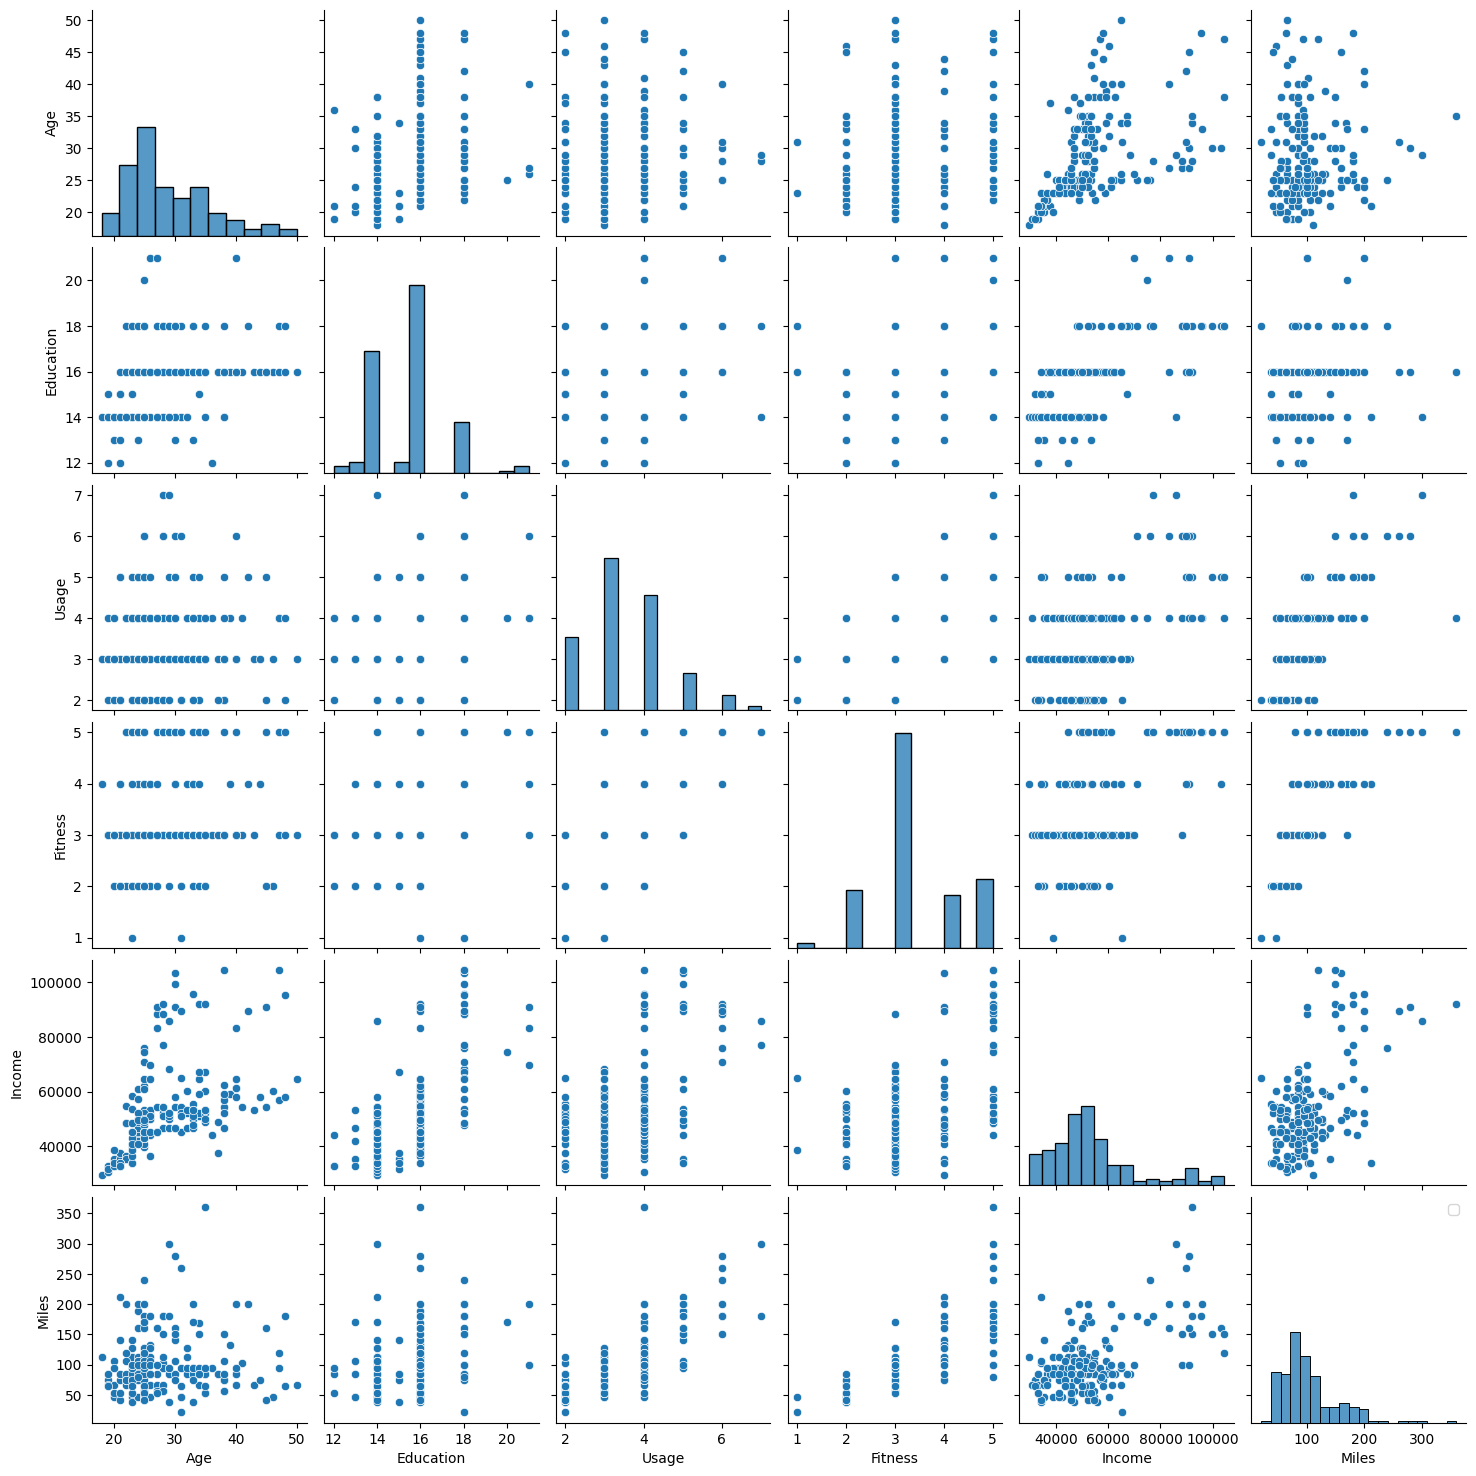

In [ ]:
sns.pairplot(df)
# plt.title('Pairplot')
plt.legend(loc='best')
plt.grid()
plt.show()

## **Final Insights**

**Demographic Insights:**

* Age and income show a strong positive correlation, indicating that as age increases, so does income.
* Education and income are also highly positively correlated.
* More customers fall into the age range of 20 to 30, with a significant portion between 25 and 30 years old.

**Product Preferences:**

* Customers who purchase the KP781 treadmill are typically in the 25 to 30 age range, with a higher median age compared to KP281/KP481 buyers.
* Median expected weekly walking distance is highest among KP781 users, suggesting a preference for more advanced fitness goals.
* The median fitness rating of KP781 users is higher than that of KP281/KP481 users.
* More KP281 treadmills are sold compared to other models.

**Income Insights:**

* KP781 buyers have a median income range of 60k to 90k, indicating a preference for higher-end products.
* KP281 buyers typically have incomes ranging from 40k to 55k, while KP481 buyers fall in a similar income range.
* Maximum income is higher for KP281 buyers compared to KP481 buyers.

**Usage Patterns:**

* Customers who buy KP781 tend to use the treadmill more frequently, with the highest median and maximum weekly usage hours.
* Customers using the treadmill three times a week are more likely to buy KP281/KP481, while those planning to use it four times a week are more likely to buy KP781.
* Customers planning to use the treadmill less than five times a week are more inclined to purchase KP281, while those planning to use it more frequently are more likely to buy KP781.
* Partnered customers with higher fitness ratings are more likely to buy KP781, while single customers with high fitness ratings are more likely to buy KP281.

**Gender and Relationship Status:**

* KP781 buyers are predominantly male, while KP281 buyers have an equal probability of being male or female.
* More customers are partnered, with a higher likelihood of KP281 purchase if they are partnered and in the medium income class.
* Single customers with medium income levels are more likely to buy KP481.

**Education Levels:**

* KP781 buyers tend to have higher education levels, with a significant portion educated between 16 and 18.
* Customers buying KP281/KP481 are typically educated between 14 and 16.

**Income Classes:**

* KP781 buyers are typically in the high-income class (80k to 100k), while KP281/KP481 buyers are more likely to be in the medium income class (40k to 60k).
* High-income individuals are very likely to buy KP781, while low-income individuals are more inclined to purchase KP281.
* Medium-income individuals are equally likely to buy KP281 or KP481.

## **Recommendations**

**Target High-Income Customers:** Focus on marketing and promotions targeting high-income individuals. The data suggests that customers with high incomes are more likely to purchase the KP781 product, which appears to be a premium option.

**Product Customization:** Consider offering customization options for the KP781 treadmill to cater to the preferences and fitness goals of high-income customers. This could include advanced features, personalized training plans, or exclusive memberships.

**Age-Specific Marketing:** Tailor marketing efforts to specific age groups. For instance, concentrate on advertising KP781 to customers aged 25 to 30, as this age range is more likely to purchase this product. For KP281, target customers aged 30 to 35.

**Educational Programs:** Develop educational programs or content related to fitness and treadmill usage. Customers with higher education levels tend to have higher incomes and may be interested in advanced training options.

**Gender-Based Marketing:** Recognize the gender preferences for different products. KP781 is more likely to be purchased by males, while KP281 appeals to both males and females. Adjust marketing strategies accordingly.

**Usage Frequency Incentives:** Encourage customers to use the treadmill more frequently. Provide incentives, rewards, or challenges for customers who commit to using the treadmill 4 or more times a week, especially for KP781 buyers.

**Income-Based Discounts:** Consider offering income-based discounts or financing options for medium-income customers interested in KP281/KP481. This could make the product more accessible to a broader range of income groups.

**Customer Engagement:** Establish a customer engagement strategy, such as regular follow-ups, fitness challenges, or online communities, to keep customers motivated and committed to using their treadmills.

**Product Bundles:** Create bundles that include fitness accessories or complementary products with treadmill purchases to add value and encourage sales.

**Market Segmentation:** Segment the market further based on income, education, and usage frequency to tailor marketing messages and product offerings even more effectively.

**Customer Reviews and Testimonials:** Use positive customer reviews and testimonials, especially from satisfied KP781 users, in marketing materials to build trust and credibility.

**Competitive Analysis:** Continuously monitor and analyze the competition in the fitness industry to identify opportunities for product differentiation and improvement.

**Customer Support and Service:** Invest in excellent customer support and service, as it can significantly impact customer satisfaction and loyalty.

**Social Media and Influencer Marketing:** Leverage social media and fitness influencers to promote your products and reach a wider audience, especially among the younger age groups.

**Data-Driven Decision-Making:** Continue collecting and analyzing data to make informed decisions about product development, marketing strategies, and customer engagement initiatives.